In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [2]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [4]:
from glob import glob

files = glob("mid-data/s_con*.csv")
file_paths = sorted(files)
file_paths

['mid-data\\s_con_adu.csv', 'mid-data\\s_con_ch.csv']

In [5]:
df_s_con1 = pd.read_csv(file_paths[0], encoding='cp949')
df_s_con1

,범죄별,재범기간및종류별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
0,합계,합계,재범자 재범기간 및 종류[명],명,783814,886539,894311,841430,851046,889429,803710,718529,706860,666421,584758,NaN
1,합계,동종재범,재범자 재범기간 및 종류[명],명,282822,300284,301607,274982,273602,277430,250467,222759,211828,199403,171343,NaN
2,합계,1개월이내,재범자 재범기간 및 종류[명],명,12749,15301,13823,11112,11095,12294,10598,10074,10056,10702,8808,NaN
3,합계,3개월이내,재범자 재범기간 및 종류[명],명,18207,20751,18304,15312,15913,17608,15776,14065,13812,13699,10904,NaN
4,합계,6개월이내,재범자 재범기간 및 종류[명],명,17112,19202,18859,17968,17791,19166,17898,15584,14884,14275,11360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4126,기타 특별법,6개월이내,재범자 재범기간 및 종류[명],명,861,999,1087,513,590,629,707,716,723,685,526,NaN
4127,기타 특별법,1년이내,재범자 재범기간 및 종류[명],명,4893,4615,4835,2091,2309,2457,2823,3121,3300,3211,2824,NaN
4128,기타 특별법,2년이내,재범자 재범기간 및 종류[명],명,4018,3599,3541,1434,1681,1801,2042,2239,2513,2021,1764,NaN
4129,기타 특별법,3년이내,재범자 재범기간 및 종류[명],명,5061,5077,5059,1534,1751,2027,2239,2385,2608,2300,2080,NaN


In [6]:
df_s_con1 = df_s_con1.loc[df_s_con1['범죄별'] == '형법범']
df_s_con1

,범죄별,재범기간및종류별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
17,형법범,합계,재범자 재범기간 및 종류[명],명,399504,469806,464654,438407,449846,453763,425866,409671,422216,405318,340385,NaN
18,형법범,동종재범,재범자 재범기간 및 종류[명],명,137325,154282,147451,132003,130544,128149,121924,121128,124541,120353,100761,NaN
19,형법범,1개월이내,재범자 재범기간 및 종류[명],명,9299,11362,9933,8291,8179,8548,7791,8122,8299,9105,7284,NaN
20,형법범,3개월이내,재범자 재범기간 및 종류[명],명,11969,14743,12568,10490,10850,10895,10576,10652,10765,10909,8483,NaN
21,형법범,6개월이내,재범자 재범기간 및 종류[명],명,9826,12193,11486,10957,10653,10721,10545,10738,10680,10601,8368,NaN
22,형법범,1년이내,재범자 재범기간 및 종류[명],명,33135,37673,37539,33742,33818,33695,32337,31921,33665,33521,27883,NaN
23,형법범,2년이내,재범자 재범기간 및 종류[명],명,18100,18967,18104,17111,16004,15826,15295,15789,16123,14724,13134,NaN
24,형법범,3년이내,재범자 재범기간 및 종류[명],명,17615,19481,19916,16215,16105,15415,14800,14862,15558,14094,11951,NaN
25,형법범,3년초과,재범자 재범기간 및 종류[명],명,37381,39863,37905,35197,34935,33049,30580,29044,29451,27399,23658,NaN
26,형법범,이종재범,재범자 재범기간 및 종류[명],명,262179,315524,317203,306404,319302,325614,303942,288543,297675,284965,239624,NaN


In [7]:
df_s_con1 = df_s_con1.drop(['항목','단위', 'Unnamed: 15'], axis=1)
df_s_con1.drop([17], axis=0, inplace=True)
df_s_con1

,범죄별,재범기간및종류별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
18,형법범,동종재범,137325,154282,147451,132003,130544,128149,121924,121128,124541,120353,100761
19,형법범,1개월이내,9299,11362,9933,8291,8179,8548,7791,8122,8299,9105,7284
20,형법범,3개월이내,11969,14743,12568,10490,10850,10895,10576,10652,10765,10909,8483
21,형법범,6개월이내,9826,12193,11486,10957,10653,10721,10545,10738,10680,10601,8368
22,형법범,1년이내,33135,37673,37539,33742,33818,33695,32337,31921,33665,33521,27883
23,형법범,2년이내,18100,18967,18104,17111,16004,15826,15295,15789,16123,14724,13134
24,형법범,3년이내,17615,19481,19916,16215,16105,15415,14800,14862,15558,14094,11951
25,형법범,3년초과,37381,39863,37905,35197,34935,33049,30580,29044,29451,27399,23658
26,형법범,이종재범,262179,315524,317203,306404,319302,325614,303942,288543,297675,284965,239624
27,형법범,1개월이내,6267,9871,8290,7138,7134,7251,6132,5393,5342,5706,4326


In [8]:
df_s_con1 = df_s_con1.drop(['범죄별'], axis=1)
df_s_con1

,재범기간및종류별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
18,동종재범,137325,154282,147451,132003,130544,128149,121924,121128,124541,120353,100761
19,1개월이내,9299,11362,9933,8291,8179,8548,7791,8122,8299,9105,7284
20,3개월이내,11969,14743,12568,10490,10850,10895,10576,10652,10765,10909,8483
21,6개월이내,9826,12193,11486,10957,10653,10721,10545,10738,10680,10601,8368
22,1년이내,33135,37673,37539,33742,33818,33695,32337,31921,33665,33521,27883
23,2년이내,18100,18967,18104,17111,16004,15826,15295,15789,16123,14724,13134
24,3년이내,17615,19481,19916,16215,16105,15415,14800,14862,15558,14094,11951
25,3년초과,37381,39863,37905,35197,34935,33049,30580,29044,29451,27399,23658
26,이종재범,262179,315524,317203,306404,319302,325614,303942,288543,297675,284965,239624
27,1개월이내,6267,9871,8290,7138,7134,7251,6132,5393,5342,5706,4326


In [9]:
df_s_con1 = df_s_con1.set_index("재범기간및종류별")
df_s_con1 = df_s_con1.sort_index()
df_s_con1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
재범기간및종류별,,,,,,,,,,,
1개월이내,9299,11362,9933,8291,8179,8548,7791,8122,8299,9105,7284
1개월이내,6267,9871,8290,7138,7134,7251,6132,5393,5342,5706,4326
1년이내,33135,37673,37539,33742,33818,33695,32337,31921,33665,33521,27883
1년이내,42111,49579,50340,49054,51464,52323,49556,45783,45463,44169,35584
2년이내,18100,18967,18104,17111,16004,15826,15295,15789,16123,14724,13134
2년이내,32243,35595,33954,34162,35303,35859,33458,32953,32695,28977,24585
3개월이내,11969,14743,12568,10490,10850,10895,10576,10652,10765,10909,8483
3개월이내,10513,12859,12087,10395,11388,11699,11003,9560,9418,9190,6956
3년이내,17615,19481,19916,16215,16105,15415,14800,14862,15558,14094,11951


In [10]:
df_s_con1 = df_s_con1.transpose()
df_s_con1

재범기간및종류별,1개월이내,1개월이내,1년이내,1년이내,2년이내,2년이내,3개월이내,3개월이내,3년이내,3년이내,3년초과,3년초과,6개월이내,6개월이내,동종재범,이종재범
2011 년,9299,6267,33135,42111,18100,32243,11969,10513,17615,34726,37381,125855,9826,10464,137325,262179
2012 년,11362,9871,37673,49579,18967,35595,14743,12859,19481,41008,39863,152917,12193,13695,154282,315524
2013 년,9933,8290,37539,50340,18104,33954,12568,12087,19916,42962,37905,155637,11486,13933,147451,317203
2014 년,8291,7138,33742,49054,17111,34162,10490,10395,16215,36381,35197,155648,10957,13626,132003,306404
2015 년,8179,7134,33818,51464,16004,35303,10850,11388,16105,37061,34935,162837,10653,14115,130544,319302
2016 년,8548,7251,33695,52323,15826,35859,10895,11699,15415,38216,33049,165980,10721,14286,128149,325614
2017 년,7791,6132,32337,49556,15295,33458,10576,11003,14800,35598,30580,154565,10545,13630,121924,303942
2018 년,8122,5393,31921,45783,15789,32953,10652,9560,14862,34034,29044,148385,10738,12435,121128,288543
2019 년,8299,5342,33665,45463,16123,32695,10765,9418,15558,35826,29451,157074,10680,11857,124541,297675
2020 년,9105,5706,33521,44169,14724,28977,10909,9190,14094,32645,27399,153071,10601,11207,120353,284965


In [11]:
df_s_con1 = df_s_con1.astype('int')
df_s_con1

재범기간및종류별,1개월이내,1개월이내,1년이내,1년이내,2년이내,2년이내,3개월이내,3개월이내,3년이내,3년이내,3년초과,3년초과,6개월이내,6개월이내,동종재범,이종재범
2011 년,9299,6267,33135,42111,18100,32243,11969,10513,17615,34726,37381,125855,9826,10464,137325,262179
2012 년,11362,9871,37673,49579,18967,35595,14743,12859,19481,41008,39863,152917,12193,13695,154282,315524
2013 년,9933,8290,37539,50340,18104,33954,12568,12087,19916,42962,37905,155637,11486,13933,147451,317203
2014 년,8291,7138,33742,49054,17111,34162,10490,10395,16215,36381,35197,155648,10957,13626,132003,306404
2015 년,8179,7134,33818,51464,16004,35303,10850,11388,16105,37061,34935,162837,10653,14115,130544,319302
2016 년,8548,7251,33695,52323,15826,35859,10895,11699,15415,38216,33049,165980,10721,14286,128149,325614
2017 년,7791,6132,32337,49556,15295,33458,10576,11003,14800,35598,30580,154565,10545,13630,121924,303942
2018 년,8122,5393,31921,45783,15789,32953,10652,9560,14862,34034,29044,148385,10738,12435,121128,288543
2019 년,8299,5342,33665,45463,16123,32695,10765,9418,15558,35826,29451,157074,10680,11857,124541,297675
2020 년,9105,5706,33521,44169,14724,28977,10909,9190,14094,32645,27399,153071,10601,11207,120353,284965


In [12]:
df_s_con1.dtypes

재범기간및종류별
1개월이내    int32
1개월이내    int32
1년이내     int32
1년이내     int32
2년이내     int32
2년이내     int32
3개월이내    int32
3개월이내    int32
3년이내     int32
3년이내     int32
3년초과     int32
3년초과     int32
6개월이내    int32
6개월이내    int32
동종재범     int32
이종재범     int32
dtype: object

In [13]:
df_s_con1.columns = ['1개월이내','1개월이내_1','1년이내','1년이내_1','2년이내','3개월이내','3개월이내_1','3년이내','3년이내_1','3년초과','3년초과_1','6개월이내','6개월이내_1','동종재범','이종재범','합계']

In [14]:
df_s_con1['1개월 이내'] = df_s_con1['1개월이내'] + df_s_con1['1개월이내_1']
df_s_con1['1년 이내'] = df_s_con1['1년이내'] + df_s_con1['1년이내_1']
df_s_con1['3개월 이내'] = df_s_con1['3개월이내'] + df_s_con1['3개월이내_1']
df_s_con1['3년 이내'] = df_s_con1['3년이내'] + df_s_con1['3년이내_1']
df_s_con1['3년 초과'] = df_s_con1['3년초과'] + df_s_con1['3년초과_1']
df_s_con1['6개월 이내'] = df_s_con1['6개월이내'] + df_s_con1['6개월이내_1']


In [15]:
df_s_con1

,1개월이내,1개월이내_1,1년이내,1년이내_1,2년이내,3개월이내,3개월이내_1,3년이내,3년이내_1,3년초과,...,6개월이내_1,동종재범,이종재범,합계,1개월 이내,1년 이내,3개월 이내,3년 이내,3년 초과,6개월 이내
2011 년,9299,6267,33135,42111,18100,32243,11969,10513,17615,34726,...,9826,10464,137325,262179,15566,75246,44212,28128,72107,135681
2012 년,11362,9871,37673,49579,18967,35595,14743,12859,19481,41008,...,12193,13695,154282,315524,21233,87252,50338,32340,80871,165110
2013 년,9933,8290,37539,50340,18104,33954,12568,12087,19916,42962,...,11486,13933,147451,317203,18223,87879,46522,32003,80867,167123
2014 년,8291,7138,33742,49054,17111,34162,10490,10395,16215,36381,...,10957,13626,132003,306404,15429,82796,44652,26610,71578,166605
2015 년,8179,7134,33818,51464,16004,35303,10850,11388,16105,37061,...,10653,14115,130544,319302,15313,85282,46153,27493,71996,173490
2016 년,8548,7251,33695,52323,15826,35859,10895,11699,15415,38216,...,10721,14286,128149,325614,15799,86018,46754,27114,71265,176701
2017 년,7791,6132,32337,49556,15295,33458,10576,11003,14800,35598,...,10545,13630,121924,303942,13923,81893,44034,25803,66178,165110
2018 년,8122,5393,31921,45783,15789,32953,10652,9560,14862,34034,...,10738,12435,121128,288543,13515,77704,43605,24422,63078,159123
2019 년,8299,5342,33665,45463,16123,32695,10765,9418,15558,35826,...,10680,11857,124541,297675,13641,79128,43460,24976,65277,167754
2020 년,9105,5706,33521,44169,14724,28977,10909,9190,14094,32645,...,10601,11207,120353,284965,14811,77690,39886,23284,60044,163672


In [16]:
df_s_con1 = df_s_con1.drop(['1개월이내','1개월이내_1','1년이내','1년이내_1','3개월이내','3개월이내_1','3년이내','3년이내_1','3년초과','3년초과_1','6개월이내','6개월이내_1'], axis=1)
df_s_con1

,2년이내,동종재범,이종재범,합계,1개월 이내,1년 이내,3개월 이내,3년 이내,3년 초과,6개월 이내
2011 년,18100,10464,137325,262179,15566,75246,44212,28128,72107,135681
2012 년,18967,13695,154282,315524,21233,87252,50338,32340,80871,165110
2013 년,18104,13933,147451,317203,18223,87879,46522,32003,80867,167123
2014 년,17111,13626,132003,306404,15429,82796,44652,26610,71578,166605
2015 년,16004,14115,130544,319302,15313,85282,46153,27493,71996,173490
2016 년,15826,14286,128149,325614,15799,86018,46754,27114,71265,176701
2017 년,15295,13630,121924,303942,13923,81893,44034,25803,66178,165110
2018 년,15789,12435,121128,288543,13515,77704,43605,24422,63078,159123
2019 년,16123,11857,124541,297675,13641,79128,43460,24976,65277,167754
2020 년,14724,11207,120353,284965,14811,77690,39886,23284,60044,163672


In [17]:
df_s_con1=df_s_con1[['1개월 이내','3개월 이내','6개월 이내','1년 이내','2년이내','3년 이내','3년 초과','동종재범','이종재범','합계']]
df_s_con1

,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년이내,3년 이내,3년 초과,동종재범,이종재범,합계
2011 년,15566,44212,135681,75246,18100,28128,72107,10464,137325,262179
2012 년,21233,50338,165110,87252,18967,32340,80871,13695,154282,315524
2013 년,18223,46522,167123,87879,18104,32003,80867,13933,147451,317203
2014 년,15429,44652,166605,82796,17111,26610,71578,13626,132003,306404
2015 년,15313,46153,173490,85282,16004,27493,71996,14115,130544,319302
2016 년,15799,46754,176701,86018,15826,27114,71265,14286,128149,325614
2017 년,13923,44034,165110,81893,15295,25803,66178,13630,121924,303942
2018 년,13515,43605,159123,77704,15789,24422,63078,12435,121128,288543
2019 년,13641,43460,167754,79128,16123,24976,65277,11857,124541,297675
2020 년,14811,39886,163672,77690,14724,23284,60044,11207,120353,284965


In [18]:
df_s_con1.columns = ['1개월이내','3개월이내','6개월이내','1년이내','2년이내','3년이내','3년초과','동종재범','이종재범','합계']
df_s_con1

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과,동종재범,이종재범,합계
2011 년,15566,44212,135681,75246,18100,28128,72107,10464,137325,262179
2012 년,21233,50338,165110,87252,18967,32340,80871,13695,154282,315524
2013 년,18223,46522,167123,87879,18104,32003,80867,13933,147451,317203
2014 년,15429,44652,166605,82796,17111,26610,71578,13626,132003,306404
2015 년,15313,46153,173490,85282,16004,27493,71996,14115,130544,319302
2016 년,15799,46754,176701,86018,15826,27114,71265,14286,128149,325614
2017 년,13923,44034,165110,81893,15295,25803,66178,13630,121924,303942
2018 년,13515,43605,159123,77704,15789,24422,63078,12435,121128,288543
2019 년,13641,43460,167754,79128,16123,24976,65277,11857,124541,297675
2020 년,14811,39886,163672,77690,14724,23284,60044,11207,120353,284965


In [19]:
df_s_con1 = df_s_con1.drop(['합계'], axis=1)
df_s_con1

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과,동종재범,이종재범
2011 년,15566,44212,135681,75246,18100,28128,72107,10464,137325
2012 년,21233,50338,165110,87252,18967,32340,80871,13695,154282
2013 년,18223,46522,167123,87879,18104,32003,80867,13933,147451
2014 년,15429,44652,166605,82796,17111,26610,71578,13626,132003
2015 년,15313,46153,173490,85282,16004,27493,71996,14115,130544
2016 년,15799,46754,176701,86018,15826,27114,71265,14286,128149
2017 년,13923,44034,165110,81893,15295,25803,66178,13630,121924
2018 년,13515,43605,159123,77704,15789,24422,63078,12435,121128
2019 년,13641,43460,167754,79128,16123,24976,65277,11857,124541
2020 년,14811,39886,163672,77690,14724,23284,60044,11207,120353


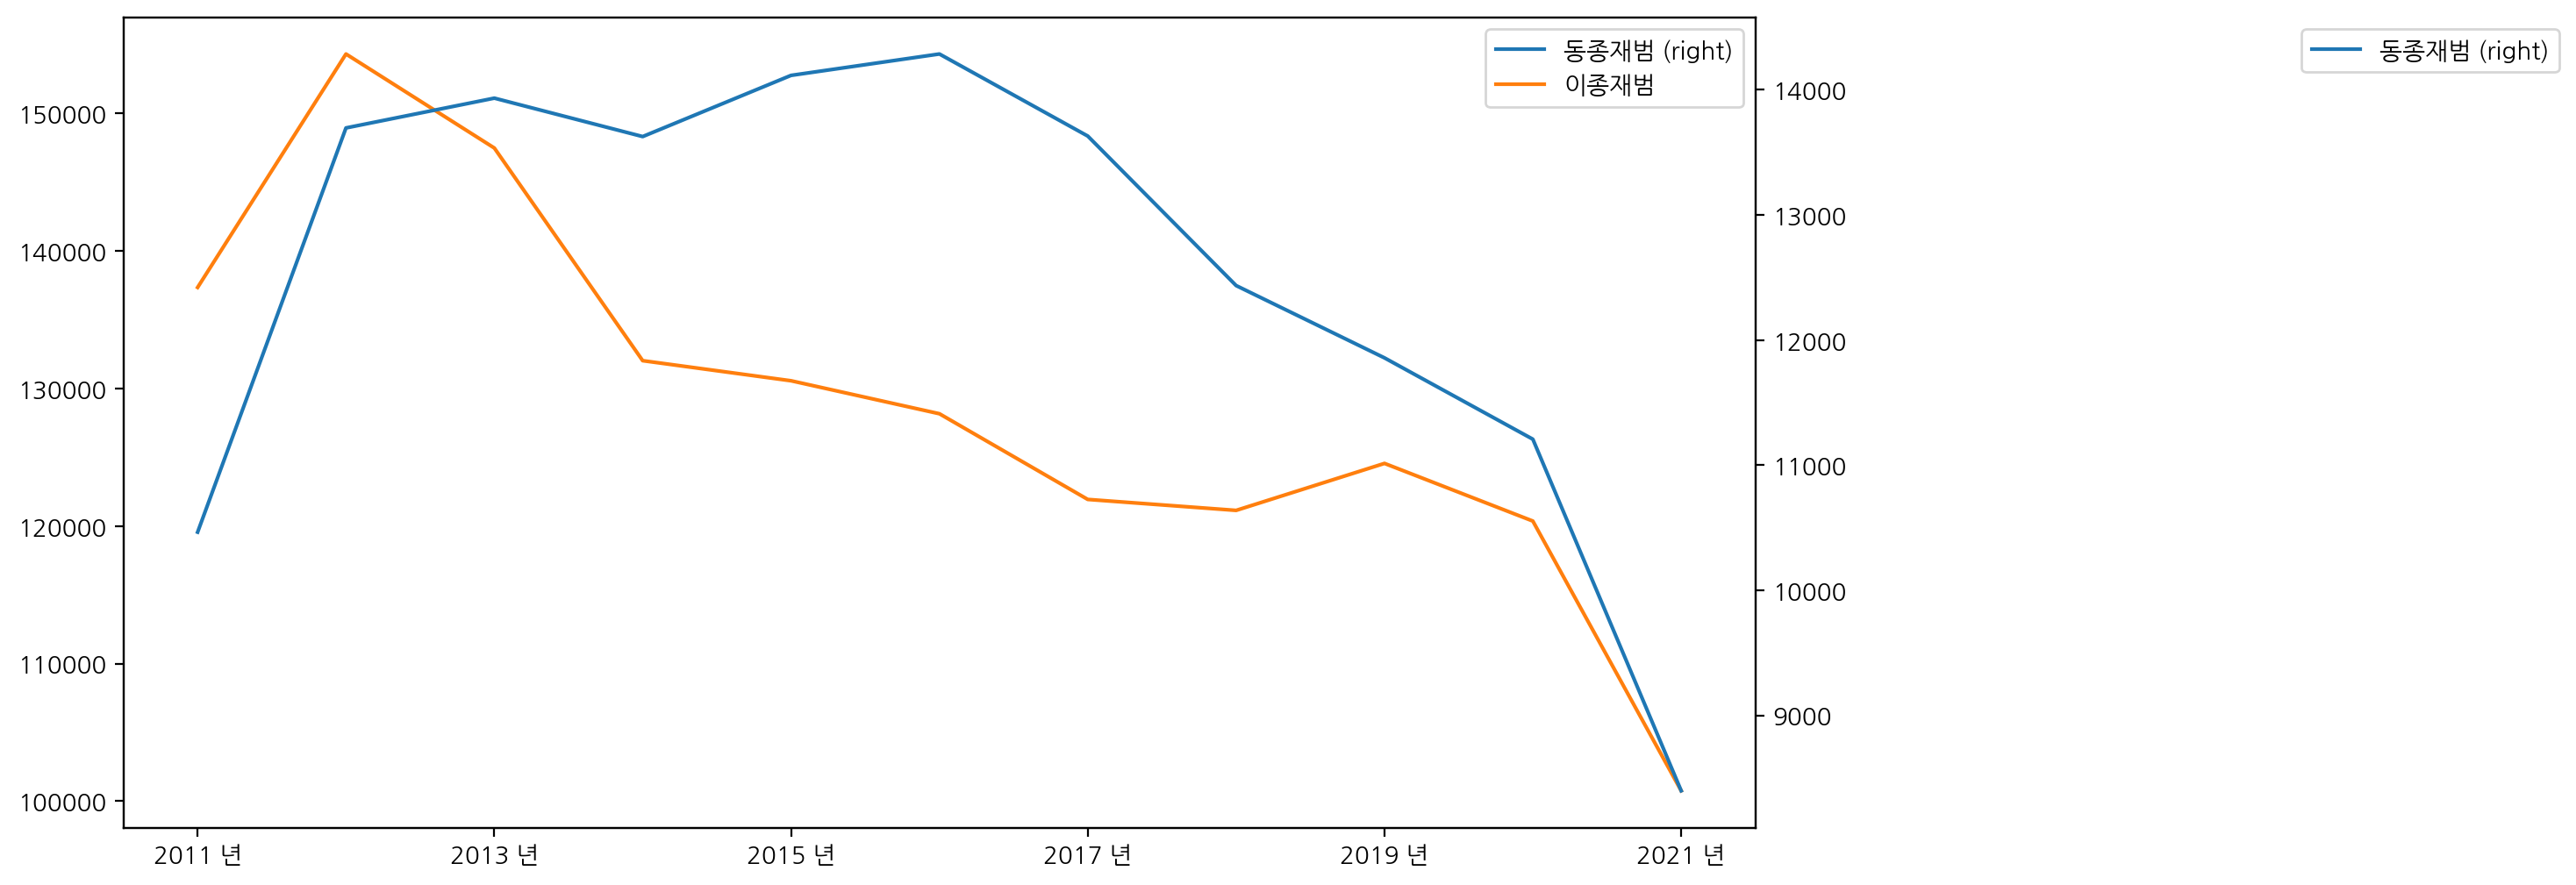

In [20]:
df_s_con1[['동종재범','이종재범']].plot(figsize=(12,6), secondary_y="동종재범")
plt.legend(bbox_to_anchor=(1.5, 1))

<AxesSubplot:>

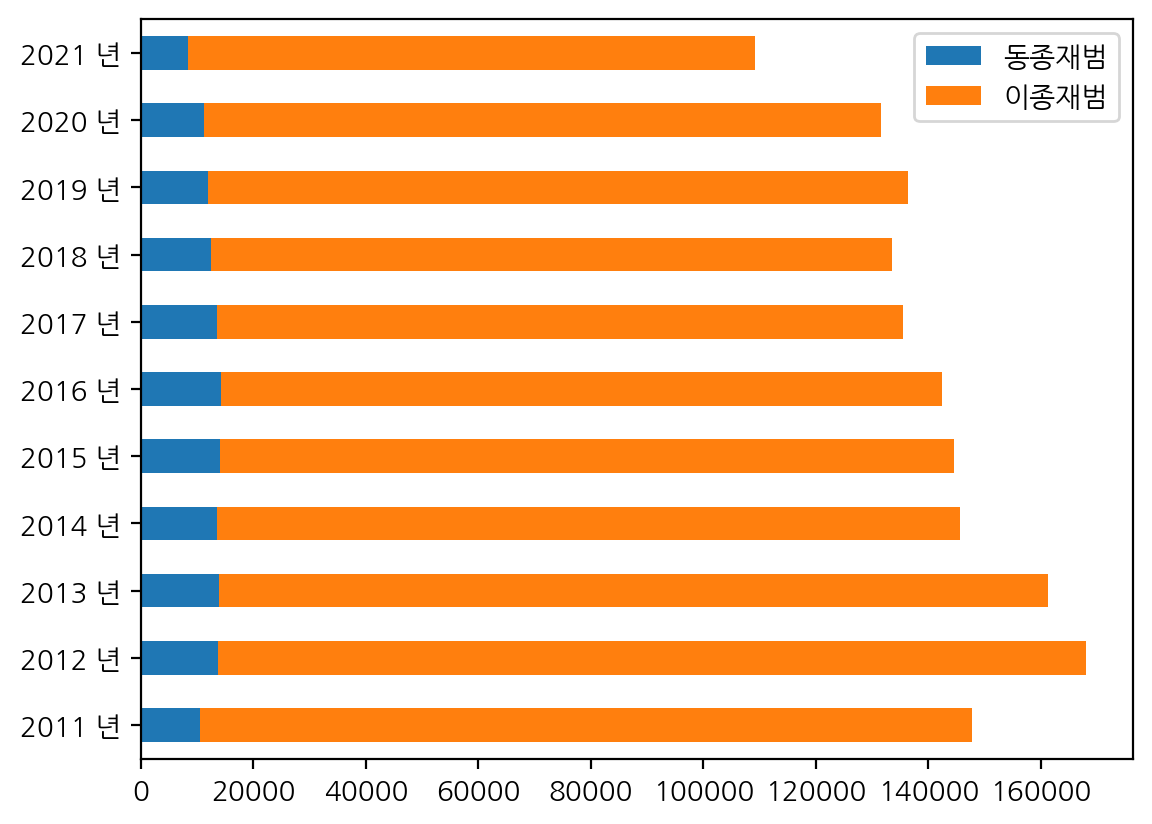

In [21]:
df_s_con1[['동종재범','이종재범']].plot.barh(stacked=True)

In [22]:
df_s_con1_2 = df_s_con1.drop(['동종재범','이종재범'], axis=1)
df_s_con1_2

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과
2011 년,15566,44212,135681,75246,18100,28128,72107
2012 년,21233,50338,165110,87252,18967,32340,80871
2013 년,18223,46522,167123,87879,18104,32003,80867
2014 년,15429,44652,166605,82796,17111,26610,71578
2015 년,15313,46153,173490,85282,16004,27493,71996
2016 년,15799,46754,176701,86018,15826,27114,71265
2017 년,13923,44034,165110,81893,15295,25803,66178
2018 년,13515,43605,159123,77704,15789,24422,63078
2019 년,13641,43460,167754,79128,16123,24976,65277
2020 년,14811,39886,163672,77690,14724,23284,60044


<AxesSubplot:>

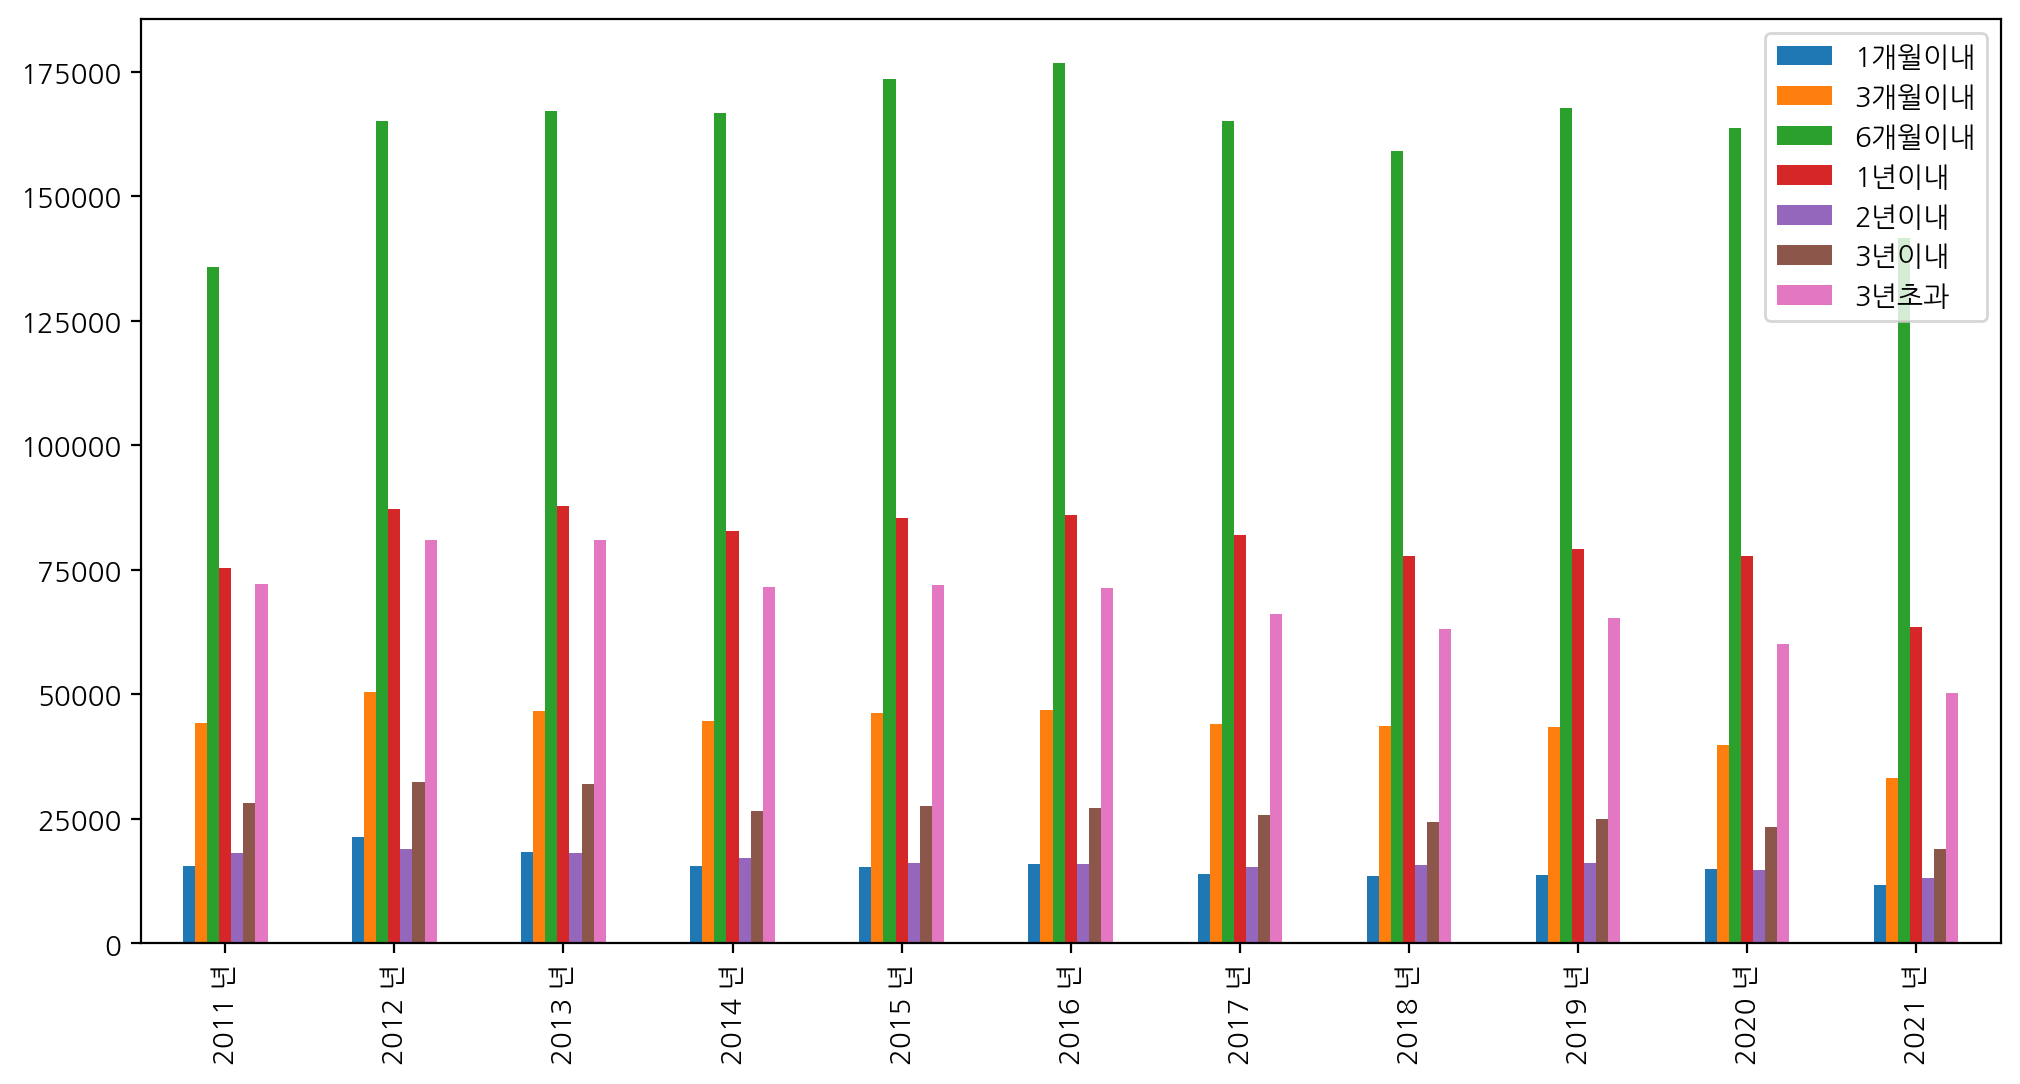

In [23]:
df_s_con1_2.plot.bar(figsize=(12,6))

<AxesSubplot:>

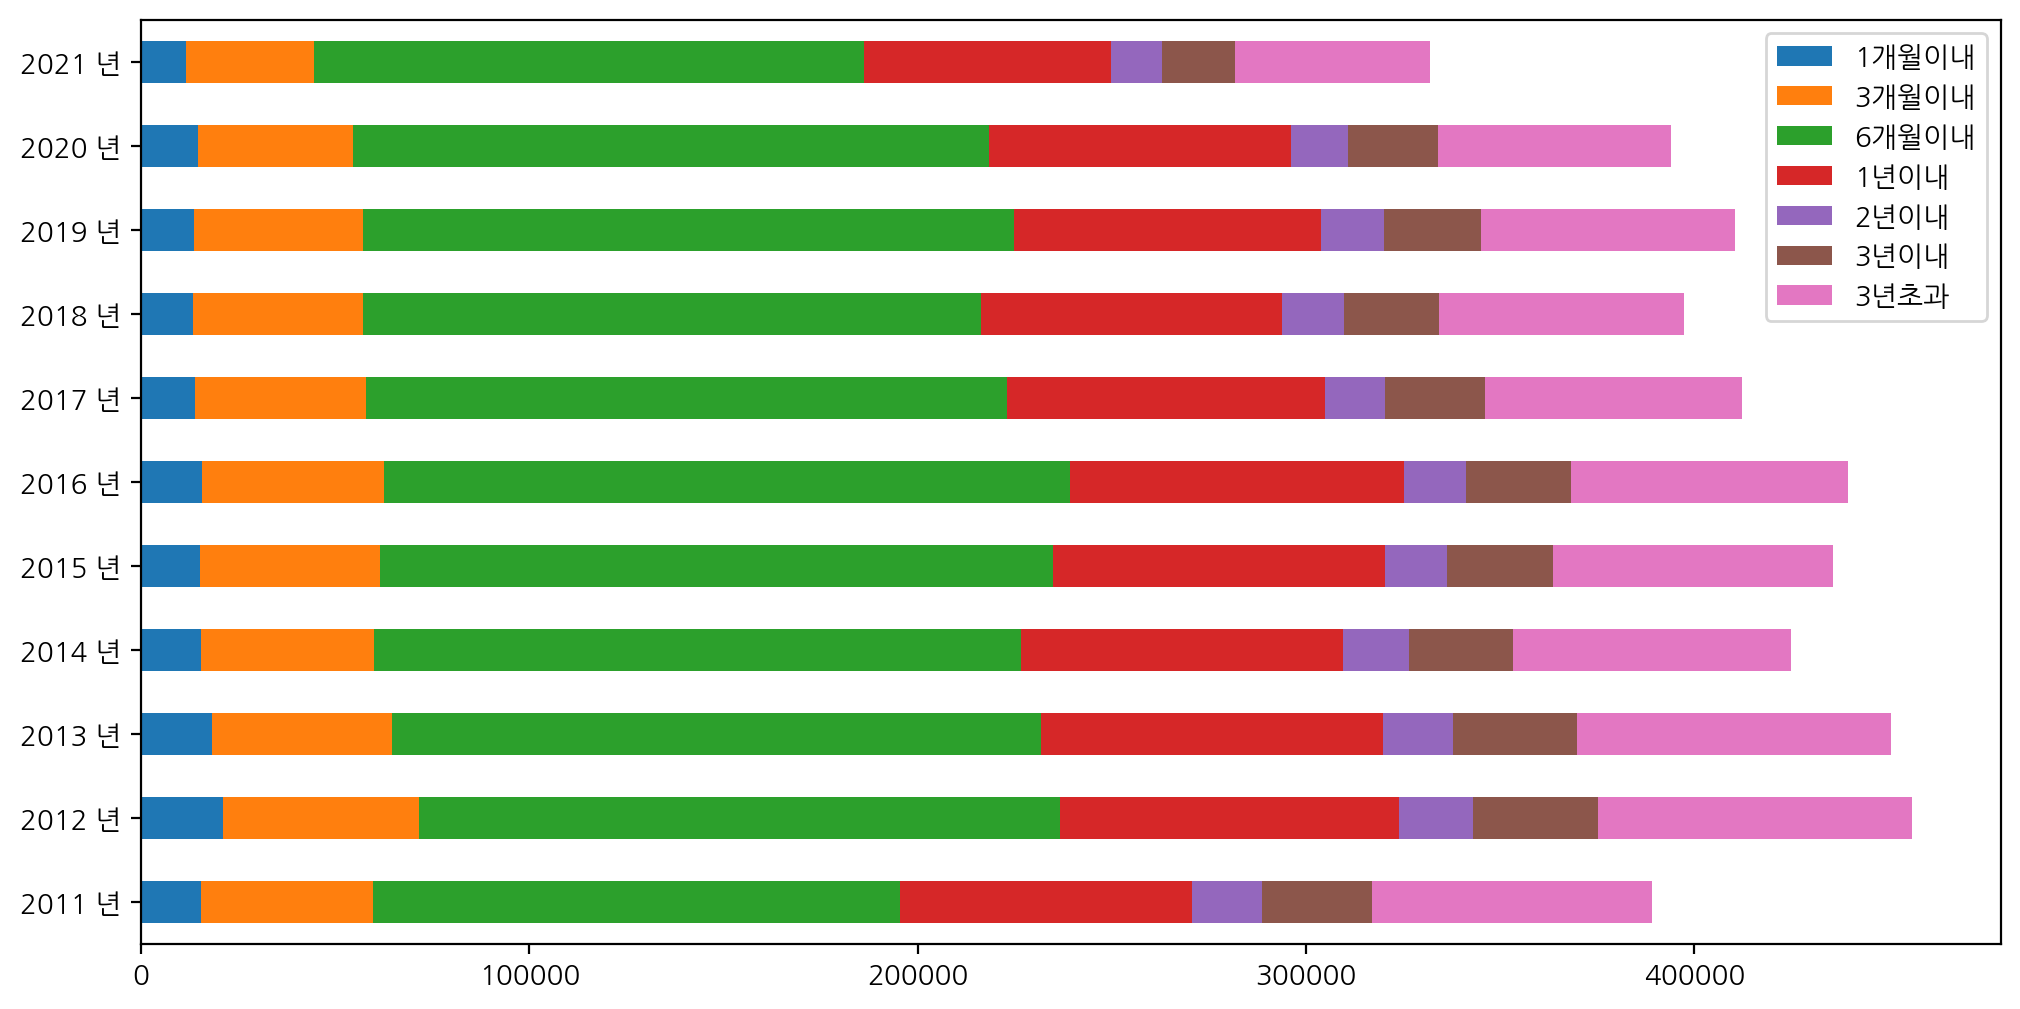

In [24]:
df_s_con1_2.plot.barh(figsize=(12,6),stacked=True, lw=5)

In [26]:
s_con1 = df_s_con1_2.transpose()

<AxesSubplot:>

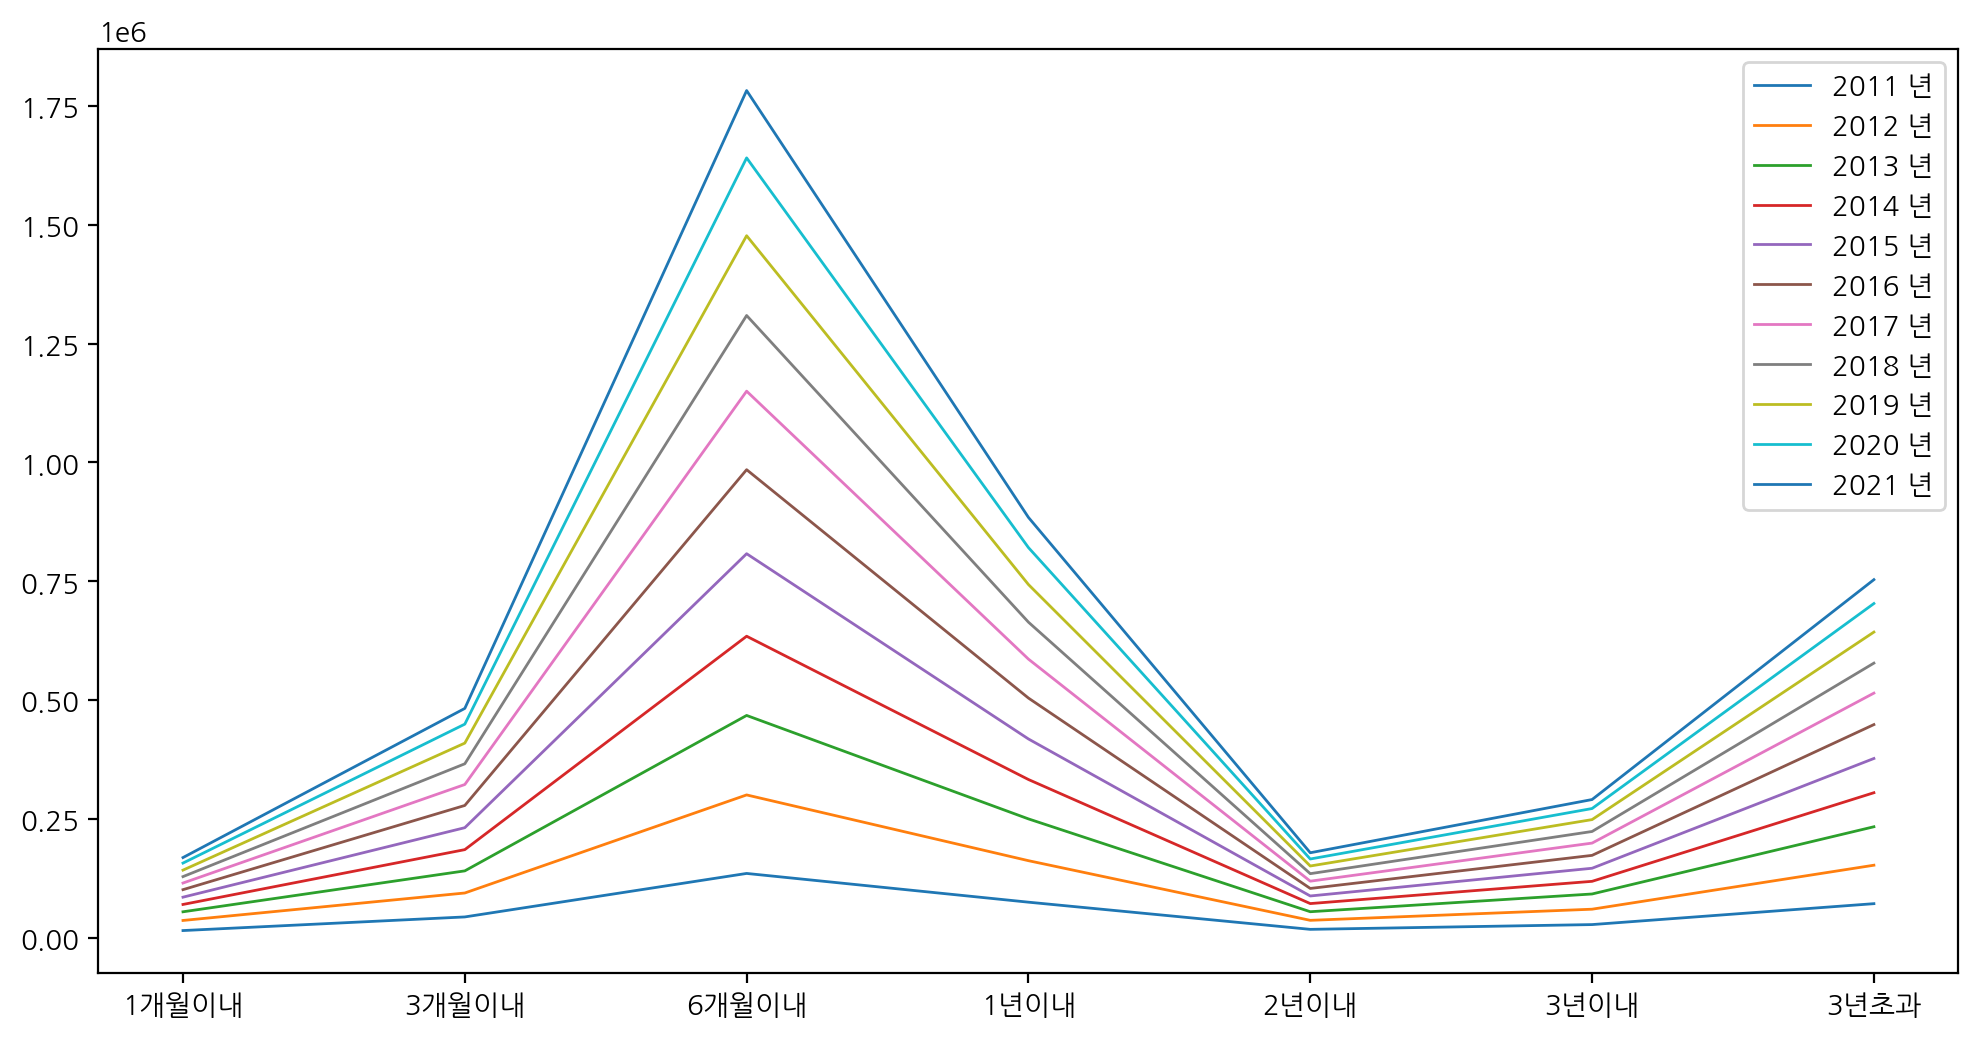

In [27]:
s_con1.plot(figsize=(12,6), lw=1, stacked=True)

In [48]:
df_s_con2 = pd.read_csv(file_paths[1], encoding='cp949')
df_s_con2

,범죄별,재범기간및종류별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
0,합계,합계,소년범죄자 재범기간 및 종류[명],명,30261,44319,41032,32265,30248,30368,28583.0,26905,26459,26906,21317,NaN
1,합계,동종재범,소년범죄자 재범기간 및 종류[명],명,14917,20234,18911,15014,13237,13103,12098.0,13091,13013,13799,10094,NaN
2,합계,1개월 이내,소년범죄자 재범기간 및 종류[명],명,2772,3962,3065,2181,1992,2221,2087.0,2227,2165,2662,1953,NaN
3,합계,3개월 이내,소년범죄자 재범기간 및 종류[명],명,3352,4525,3526,2615,2362,2575,2350.0,2499,2481,2768,1874,NaN
4,합계,6개월 이내,소년범죄자 재범기간 및 종류[명],명,2083,2864,2749,2281,1969,1886,1890.0,2101,2017,2106,1404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,기타특별법,6개월 이내,소년범죄자 재범기간 및 종류[명],명,19,17,17,9,26,23,30.0,13,20,4,15,NaN
2699,기타특별법,1년 이내,소년범죄자 재범기간 및 종류[명],명,85,62,85,45,61,47,56.0,29,51,37,48,NaN
2700,기타특별법,2년 이내,소년범죄자 재범기간 및 종류[명],명,40,29,37,31,24,23,15.0,20,18,10,21,NaN
2701,기타특별법,3년 이내,소년범죄자 재범기간 및 종류[명],명,17,19,48,12,18,13,10.0,9,9,6,14,NaN


In [49]:
df_s_con2 = df_s_con2.loc[df_s_con2['범죄별'] == '형법범']
df_s_con2

,범죄별,재범기간및종류별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
17,형법범,합계,소년범죄자 재범기간 및 종류[명],명,24275,36404,34028,26748,24867,24775,23127.0,22364,21911,21830,16848,NaN
18,형법범,동종재범,소년범죄자 재범기간 및 종류[명],명,12810,18091,16469,12982,11521,11281,10302.0,11204,11037,11483,8255,NaN
19,형법범,1개월 이내,소년범죄자 재범기간 및 종류[명],명,2502,3653,2838,2014,1828,2022,1863.0,2028,1957,2417,1739,NaN
20,형법범,3개월 이내,소년범죄자 재범기간 및 종류[명],명,2967,4146,3215,2350,2104,2277,2047.0,2244,2187,2390,1571,NaN
21,형법범,6개월 이내,소년범죄자 재범기간 및 종류[명],명,1758,2594,2370,1997,1714,1633,1591.0,1819,1699,1731,1135,NaN
22,형법범,1년 이내,소년범죄자 재범기간 및 종류[명],명,3921,5367,5077,4012,3481,3442,3045.0,3165,3204,3166,2514,NaN
23,형법범,2년 이내,소년범죄자 재범기간 및 종류[명],명,1093,1376,1748,1551,1388,1102,1018.0,1160,1159,1058,768,NaN
24,형법범,3년 이내,소년범죄자 재범기간 및 종류[명],명,470,731,945,791,762,598,571.0,602,643,533,366,NaN
25,형법범,3년 초과,소년범죄자 재범기간 및 종류[명],명,99,224,276,267,244,207,167.0,186,188,188,162,NaN
26,형법범,이종재범,소년범죄자 재범기간 및 종류[명],명,11465,18313,17559,13766,13346,13494,12825.0,11160,10874,10347,8593,NaN


In [50]:
df_s_con2 = df_s_con2.drop(['항목','단위', 'Unnamed: 15'], axis=1)
df_s_con2.drop([17], axis=0, inplace=True)
df_s_con2

,범죄별,재범기간및종류별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
18,형법범,동종재범,12810,18091,16469,12982,11521,11281,10302.0,11204,11037,11483,8255
19,형법범,1개월 이내,2502,3653,2838,2014,1828,2022,1863.0,2028,1957,2417,1739
20,형법범,3개월 이내,2967,4146,3215,2350,2104,2277,2047.0,2244,2187,2390,1571
21,형법범,6개월 이내,1758,2594,2370,1997,1714,1633,1591.0,1819,1699,1731,1135
22,형법범,1년 이내,3921,5367,5077,4012,3481,3442,3045.0,3165,3204,3166,2514
23,형법범,2년 이내,1093,1376,1748,1551,1388,1102,1018.0,1160,1159,1058,768
24,형법범,3년 이내,470,731,945,791,762,598,571.0,602,643,533,366
25,형법범,3년 초과,99,224,276,267,244,207,167.0,186,188,188,162
26,형법범,이종재범,11465,18313,17559,13766,13346,13494,12825.0,11160,10874,10347,8593
27,형법범,1개월 이내,1345,2196,2258,1733,1562,1793,1626.0,1645,1773,1961,1472


In [51]:
df_s_con2 = df_s_con2.drop(['범죄별'], axis=1)
df_s_con2

,재범기간및종류별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
18,동종재범,12810,18091,16469,12982,11521,11281,10302.0,11204,11037,11483,8255
19,1개월 이내,2502,3653,2838,2014,1828,2022,1863.0,2028,1957,2417,1739
20,3개월 이내,2967,4146,3215,2350,2104,2277,2047.0,2244,2187,2390,1571
21,6개월 이내,1758,2594,2370,1997,1714,1633,1591.0,1819,1699,1731,1135
22,1년 이내,3921,5367,5077,4012,3481,3442,3045.0,3165,3204,3166,2514
23,2년 이내,1093,1376,1748,1551,1388,1102,1018.0,1160,1159,1058,768
24,3년 이내,470,731,945,791,762,598,571.0,602,643,533,366
25,3년 초과,99,224,276,267,244,207,167.0,186,188,188,162
26,이종재범,11465,18313,17559,13766,13346,13494,12825.0,11160,10874,10347,8593
27,1개월 이내,1345,2196,2258,1733,1562,1793,1626.0,1645,1773,1961,1472


In [52]:
df_s_con2 = df_s_con2.set_index("재범기간및종류별")
df_s_con2 = df_s_con2.sort_index()
df_s_con2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
재범기간및종류별,,,,,,,,,,,
1개월 이내,2502,3653,2838,2014,1828,2022,1863.0,2028,1957,2417,1739
1개월 이내,1345,2196,2258,1733,1562,1793,1626.0,1645,1773,1961,1472
1년 이내,3921,5367,5077,4012,3481,3442,3045.0,3165,3204,3166,2514
1년 이내,3718,5706,5194,4024,3972,4117,3990.0,3339,3205,2998,2599
2년 이내,1093,1376,1748,1551,1388,1102,1018.0,1160,1159,1058,768
2년 이내,1711,2395,2253,2024,1919,1780,1684.0,1294,1308,995,1026
3개월 이내,2967,4146,3215,2350,2104,2277,2047.0,2244,2187,2390,1571
3개월 이내,1881,2832,2928,2216,2070,2294,2264.0,2125,2089,2023,1572
3년 이내,470,731,945,791,762,598,571.0,602,643,533,366


In [53]:
df_s_con2 = df_s_con2.transpose()
df_s_con2

재범기간및종류별,1개월 이내,1개월 이내,1년 이내,1년 이내,2년 이내,2년 이내,3개월 이내,3개월 이내,3년 이내,3년 이내,3년 초과,3년 초과,6개월 이내,6개월 이내,동종재범,이종재범
2011 년,2502,1345,3921,3718,1093,1711,2967,1881,470,840,99,395,1758,1575,12810,11465
2012 년,3653,2196,5367,5706,1376,2395,4146,2832,731,1299,224,1474,2594,2411,18091,18313
2013 년,2838,2258,5077,5194,1748,2253,3215,2928,945,1427,276,876,2370,2623,16469,17559
2014 년,2014,1733,4012,4024,1551,2024,2350,2216,791,1071,267,560,1997,2138,12982,13766
2015 년,1828,1562,3481,3972,1388,1919,2104,2070,762,1300,244,623,1714,1900,11521,13346
2016 년,2022,1793,3442,4117,1102,1780,2277,2294,598,1050,207,526,1633,1934,11281,13494
2017 년,1863.0,1626.0,3045.0,3990.0,1018.0,1684.0,2047.0,2264.0,571.0,925.0,167.0,422.0,1591.0,1914.0,10302.0,12825.0
2018 년,2028,1645,3165,3339,1160,1294,2244,2125,602,730,186,310,1819,1717,11204,11160
2019 년,1957,1773,3204,3205,1159,1308,2187,2089,643,674,188,270,1699,1555,11037,10874
2020 년,2417,1961,3166,2998,1058,995,2390,2023,533,527,188,269,1731,1574,11483,10347


In [54]:
df_s_con2 = df_s_con2.astype('int')
df_s_con2

재범기간및종류별,1개월 이내,1개월 이내,1년 이내,1년 이내,2년 이내,2년 이내,3개월 이내,3개월 이내,3년 이내,3년 이내,3년 초과,3년 초과,6개월 이내,6개월 이내,동종재범,이종재범
2011 년,2502,1345,3921,3718,1093,1711,2967,1881,470,840,99,395,1758,1575,12810,11465
2012 년,3653,2196,5367,5706,1376,2395,4146,2832,731,1299,224,1474,2594,2411,18091,18313
2013 년,2838,2258,5077,5194,1748,2253,3215,2928,945,1427,276,876,2370,2623,16469,17559
2014 년,2014,1733,4012,4024,1551,2024,2350,2216,791,1071,267,560,1997,2138,12982,13766
2015 년,1828,1562,3481,3972,1388,1919,2104,2070,762,1300,244,623,1714,1900,11521,13346
2016 년,2022,1793,3442,4117,1102,1780,2277,2294,598,1050,207,526,1633,1934,11281,13494
2017 년,1863,1626,3045,3990,1018,1684,2047,2264,571,925,167,422,1591,1914,10302,12825
2018 년,2028,1645,3165,3339,1160,1294,2244,2125,602,730,186,310,1819,1717,11204,11160
2019 년,1957,1773,3204,3205,1159,1308,2187,2089,643,674,188,270,1699,1555,11037,10874
2020 년,2417,1961,3166,2998,1058,995,2390,2023,533,527,188,269,1731,1574,11483,10347


In [55]:
df_s_con2.columns = ['1개월이내','1개월이내_1','1년이내','1년이내_1','2년이내','3개월이내','3개월이내_1','3년이내','3년이내_1','3년초과','3년초과_1','6개월이내','6개월이내_1','동종재범','이종재범','합계']

In [56]:
df_s_con2['1개월 이내'] = df_s_con2['1개월이내'] + df_s_con2['1개월이내_1']
df_s_con2['1년 이내'] = df_s_con2['1년이내'] + df_s_con2['1년이내_1']
df_s_con2['3개월 이내'] = df_s_con2['3개월이내'] + df_s_con2['3개월이내_1']
df_s_con2['3년 이내'] = df_s_con2['3년이내'] + df_s_con2['3년이내_1']
df_s_con2['3년 초과'] = df_s_con2['3년초과'] + df_s_con2['3년초과_1']
df_s_con2['6개월 이내'] = df_s_con2['6개월이내'] + df_s_con2['6개월이내_1']


In [57]:
df_s_con2 = df_s_con2.drop(['1개월이내','1개월이내_1','1년이내','1년이내_1','3개월이내','3개월이내_1','3년이내','3년이내_1','3년초과','3년초과_1','6개월이내','6개월이내_1'], axis=1)
df_s_con2

,2년이내,동종재범,이종재범,합계,1개월 이내,1년 이내,3개월 이내,3년 이내,3년 초과,6개월 이내
2011 년,1093,1575,12810,11465,3847,7639,4678,2351,939,2153
2012 년,1376,2411,18091,18313,5849,11073,6541,3563,1523,4068
2013 년,1748,2623,16469,17559,5096,10271,5468,3873,1703,3246
2014 년,1551,2138,12982,13766,3747,8036,4374,3007,1338,2557
2015 년,1388,1900,11521,13346,3390,7453,4023,2832,1544,2337
2016 년,1102,1934,11281,13494,3815,7559,4057,2892,1257,2159
2017 년,1018,1914,10302,12825,3489,7035,3731,2835,1092,2013
2018 년,1160,1717,11204,11160,3673,6504,3538,2727,916,2129
2019 년,1159,1555,11037,10874,3730,6409,3495,2732,862,1969
2020 년,1058,1574,11483,10347,4378,6164,3385,2556,715,2000


In [58]:
df_s_con2=df_s_con2[['1개월 이내','3개월 이내','6개월 이내','1년 이내','2년이내','3년 이내','3년 초과','동종재범','이종재범','합계']]
df_s_con2

,1개월 이내,3개월 이내,6개월 이내,1년 이내,2년이내,3년 이내,3년 초과,동종재범,이종재범,합계
2011 년,3847,4678,2153,7639,1093,2351,939,1575,12810,11465
2012 년,5849,6541,4068,11073,1376,3563,1523,2411,18091,18313
2013 년,5096,5468,3246,10271,1748,3873,1703,2623,16469,17559
2014 년,3747,4374,2557,8036,1551,3007,1338,2138,12982,13766
2015 년,3390,4023,2337,7453,1388,2832,1544,1900,11521,13346
2016 년,3815,4057,2159,7559,1102,2892,1257,1934,11281,13494
2017 년,3489,3731,2013,7035,1018,2835,1092,1914,10302,12825
2018 년,3673,3538,2129,6504,1160,2727,916,1717,11204,11160
2019 년,3730,3495,1969,6409,1159,2732,862,1555,11037,10874
2020 년,4378,3385,2000,6164,1058,2556,715,1574,11483,10347


In [59]:
df_s_con2.columns = ['1개월이내','3개월이내','6개월이내','1년이내','2년이내','3년이내','3년초과','동종재범','이종재범','합계']
df_s_con2

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과,동종재범,이종재범,합계
2011 년,3847,4678,2153,7639,1093,2351,939,1575,12810,11465
2012 년,5849,6541,4068,11073,1376,3563,1523,2411,18091,18313
2013 년,5096,5468,3246,10271,1748,3873,1703,2623,16469,17559
2014 년,3747,4374,2557,8036,1551,3007,1338,2138,12982,13766
2015 년,3390,4023,2337,7453,1388,2832,1544,1900,11521,13346
2016 년,3815,4057,2159,7559,1102,2892,1257,1934,11281,13494
2017 년,3489,3731,2013,7035,1018,2835,1092,1914,10302,12825
2018 년,3673,3538,2129,6504,1160,2727,916,1717,11204,11160
2019 년,3730,3495,1969,6409,1159,2732,862,1555,11037,10874
2020 년,4378,3385,2000,6164,1058,2556,715,1574,11483,10347


In [60]:
df_s_con2 = df_s_con2.drop(['합계'], axis=1)
df_s_con2

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과,동종재범,이종재범
2011 년,3847,4678,2153,7639,1093,2351,939,1575,12810
2012 년,5849,6541,4068,11073,1376,3563,1523,2411,18091
2013 년,5096,5468,3246,10271,1748,3873,1703,2623,16469
2014 년,3747,4374,2557,8036,1551,3007,1338,2138,12982
2015 년,3390,4023,2337,7453,1388,2832,1544,1900,11521
2016 년,3815,4057,2159,7559,1102,2892,1257,1934,11281
2017 년,3489,3731,2013,7035,1018,2835,1092,1914,10302
2018 년,3673,3538,2129,6504,1160,2727,916,1717,11204
2019 년,3730,3495,1969,6409,1159,2732,862,1555,11037
2020 년,4378,3385,2000,6164,1058,2556,715,1574,11483


<AxesSubplot:>

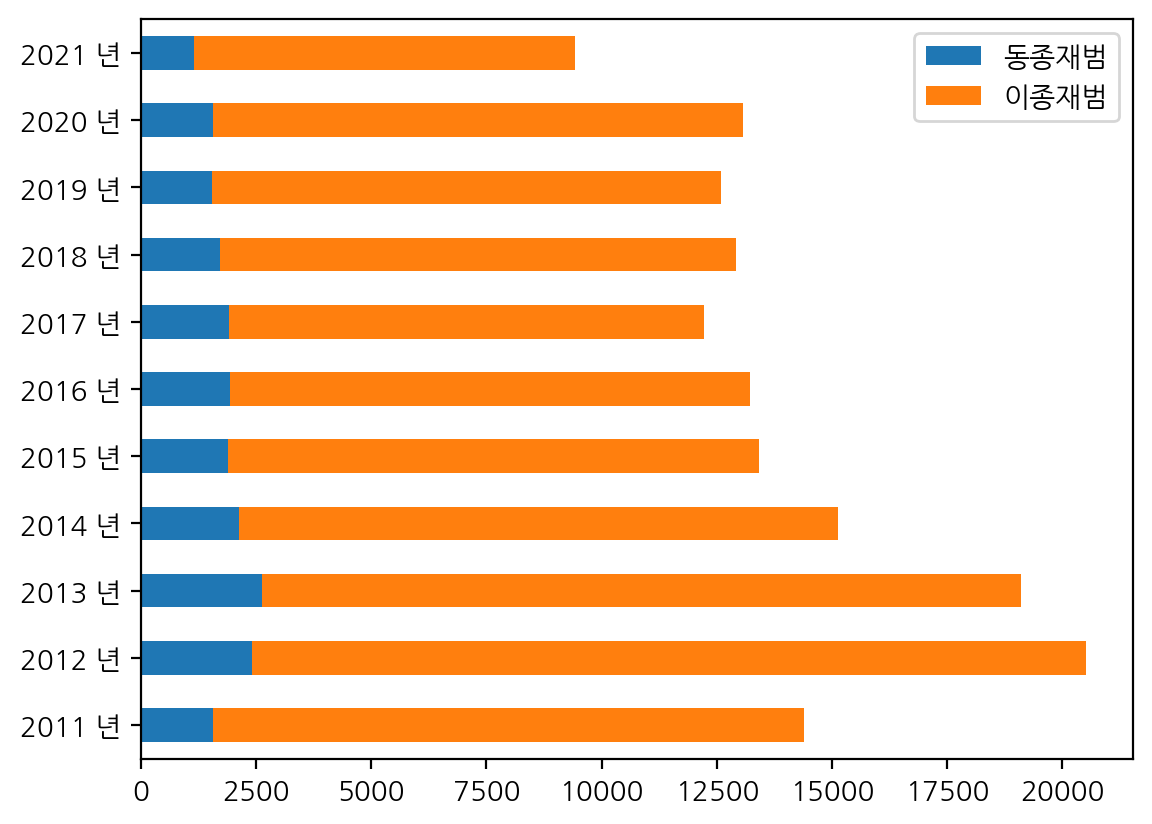

In [61]:
df_s_con2[['동종재범','이종재범']].plot.barh(stacked=True)

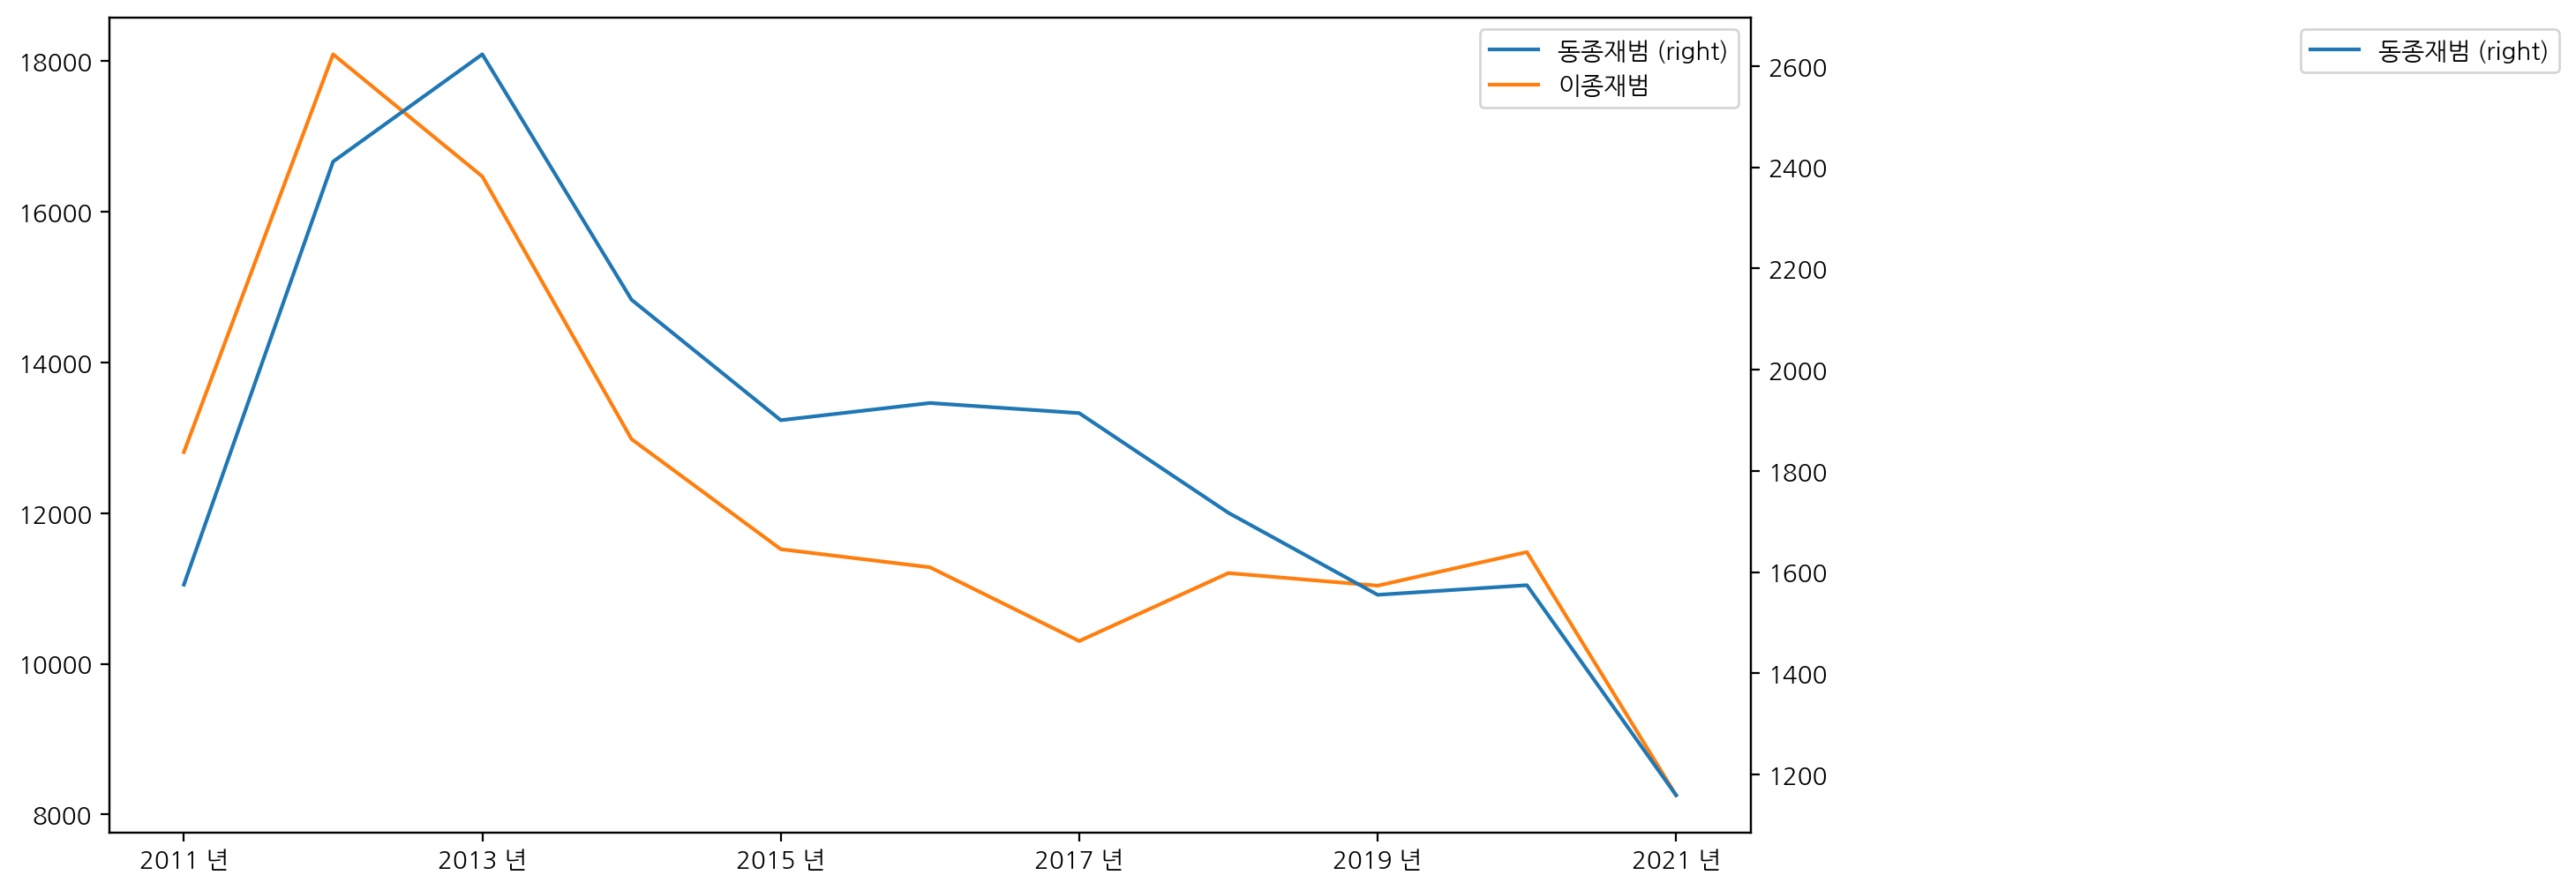

In [62]:
df_s_con2[['동종재범','이종재범']].plot(figsize=(12,6), secondary_y="동종재범")
plt.legend(bbox_to_anchor=(1.5, 1))

In [68]:
df_s_con2_2 = df_s_con2.drop(['동종재범','이종재범'], axis=1)
df_s_con2_2

,1개월이내,3개월이내,6개월이내,1년이내,2년이내,3년이내,3년초과
2011 년,3847,4678,2153,7639,1093,2351,939
2012 년,5849,6541,4068,11073,1376,3563,1523
2013 년,5096,5468,3246,10271,1748,3873,1703
2014 년,3747,4374,2557,8036,1551,3007,1338
2015 년,3390,4023,2337,7453,1388,2832,1544
2016 년,3815,4057,2159,7559,1102,2892,1257
2017 년,3489,3731,2013,7035,1018,2835,1092
2018 년,3673,3538,2129,6504,1160,2727,916
2019 년,3730,3495,1969,6409,1159,2732,862
2020 년,4378,3385,2000,6164,1058,2556,715


<AxesSubplot:>

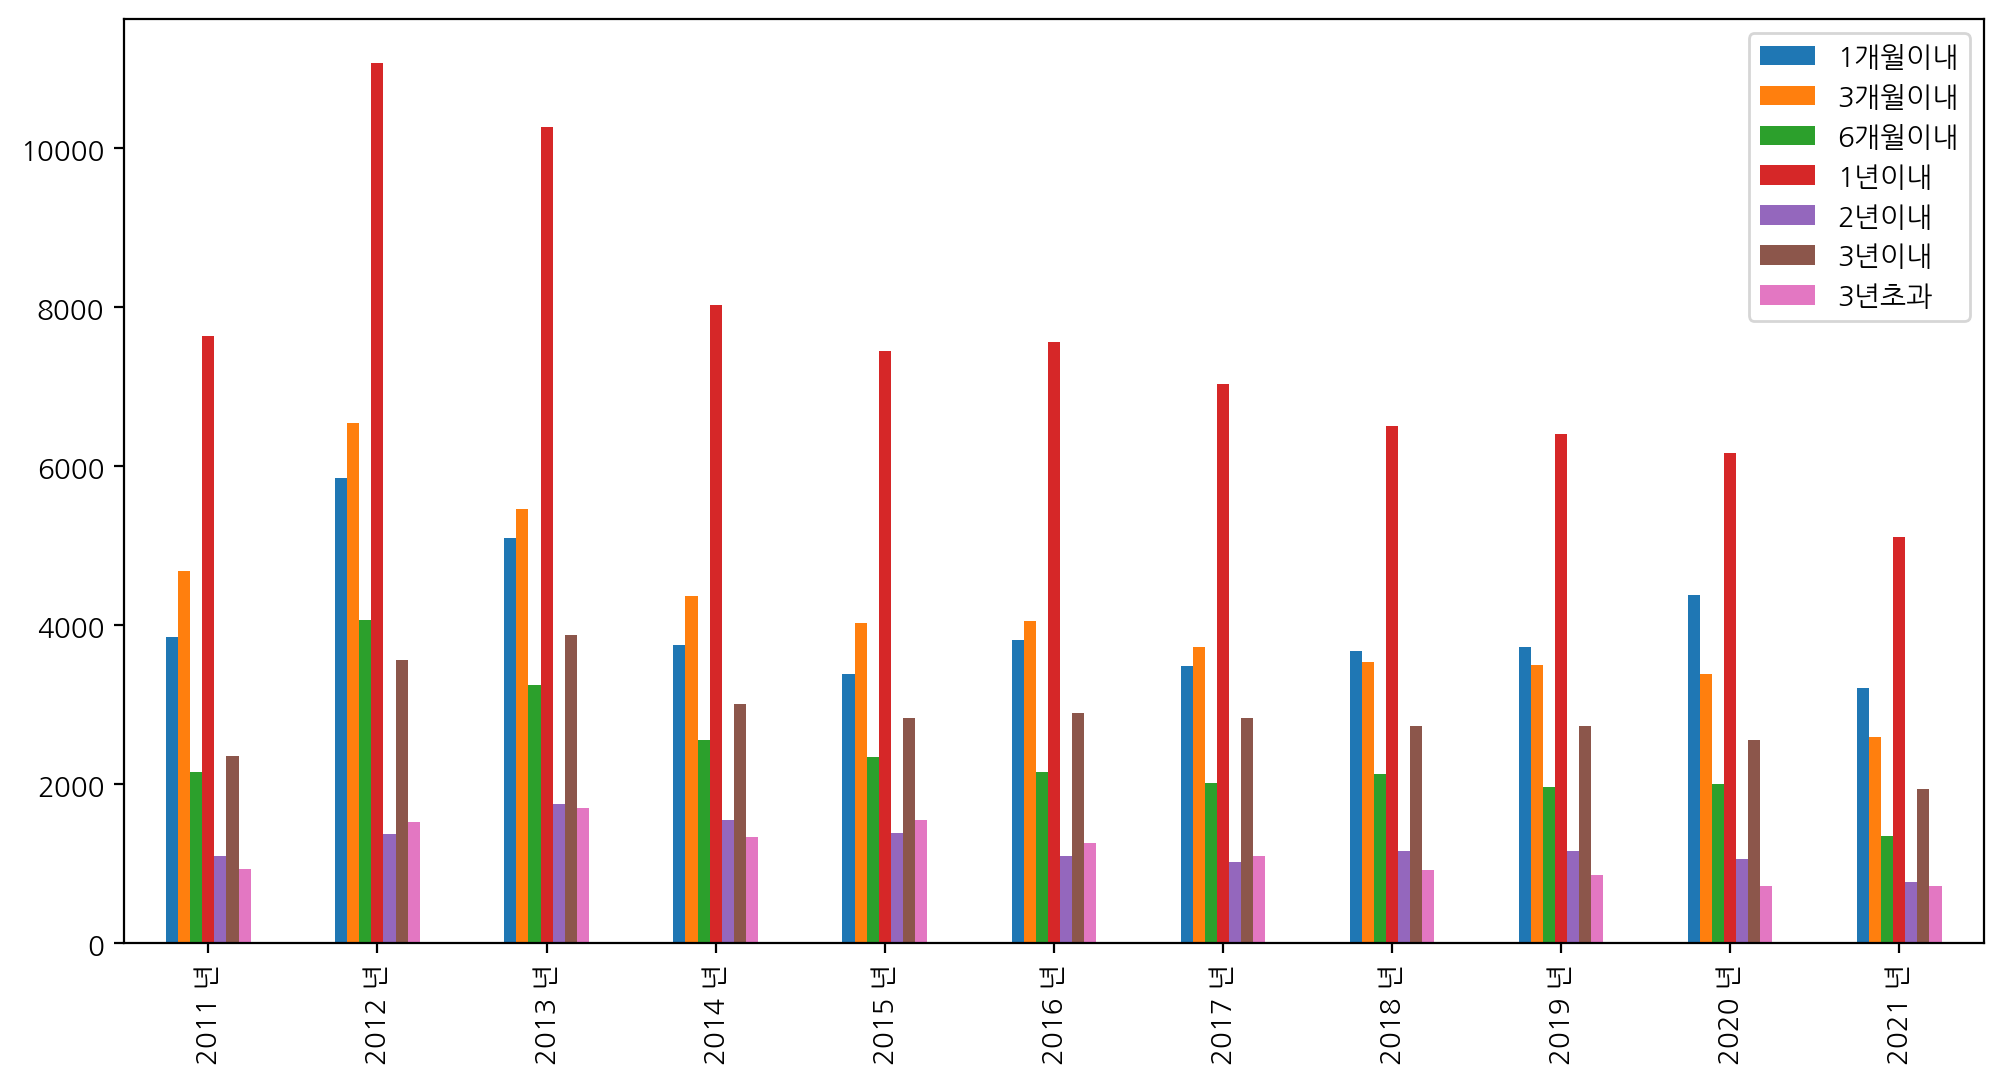

In [69]:
df_s_con2_2.plot.bar(figsize=(12,6))

<AxesSubplot:>

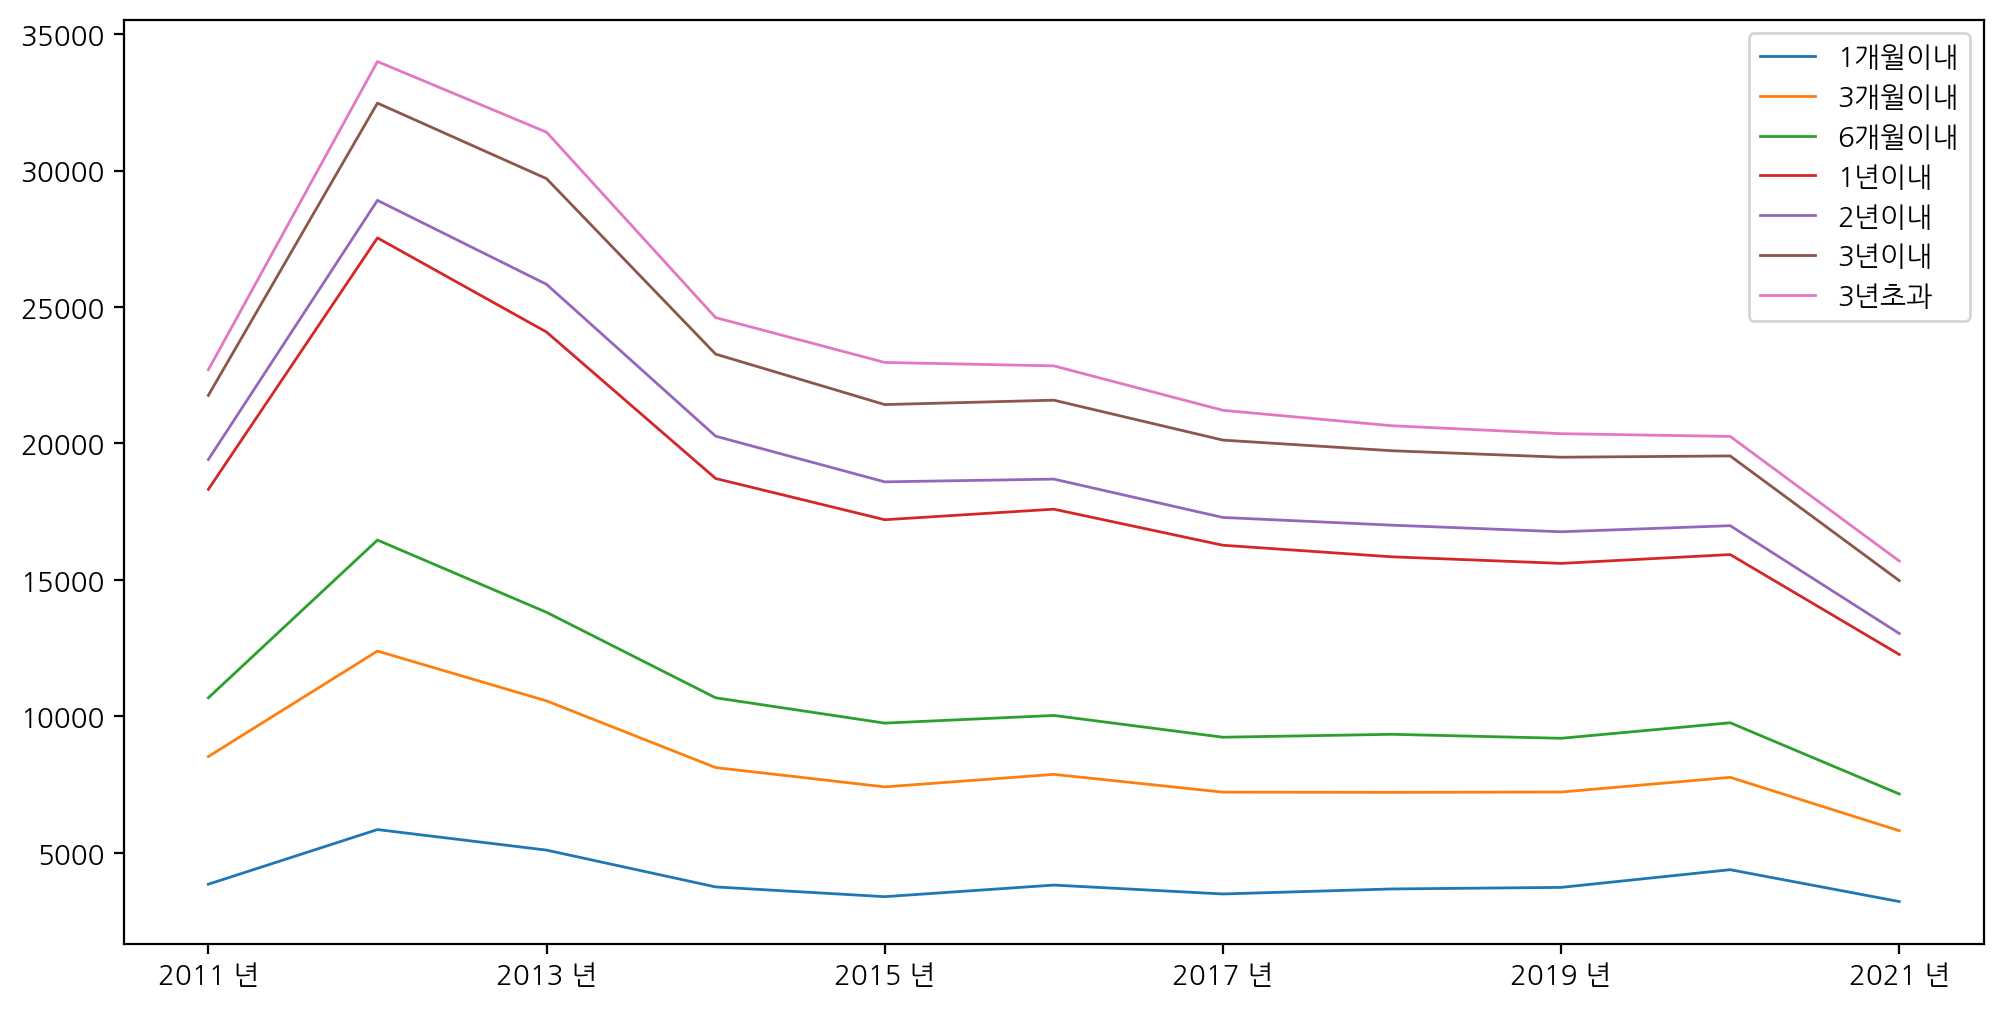

In [74]:
df_s_con2_2.plot(figsize=(12,6), lw=1, stacked=True)

In [73]:
scon2 = df_s_con2_2.transpose()
scon2

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
1개월이내,3847,5849,5096,3747,3390,3815,3489,3673,3730,4378,3211
3개월이내,4678,6541,5468,4374,4023,4057,3731,3538,3495,3385,2597
6개월이내,2153,4068,3246,2557,2337,2159,2013,2129,1969,2000,1345
1년이내,7639,11073,10271,8036,7453,7559,7035,6504,6409,6164,5113
2년이내,1093,1376,1748,1551,1388,1102,1018,1160,1159,1058,768
3년이내,2351,3563,3873,3007,2832,2892,2835,2727,2732,2556,1938
3년초과,939,1523,1703,1338,1544,1257,1092,916,862,715,717


<AxesSubplot:>

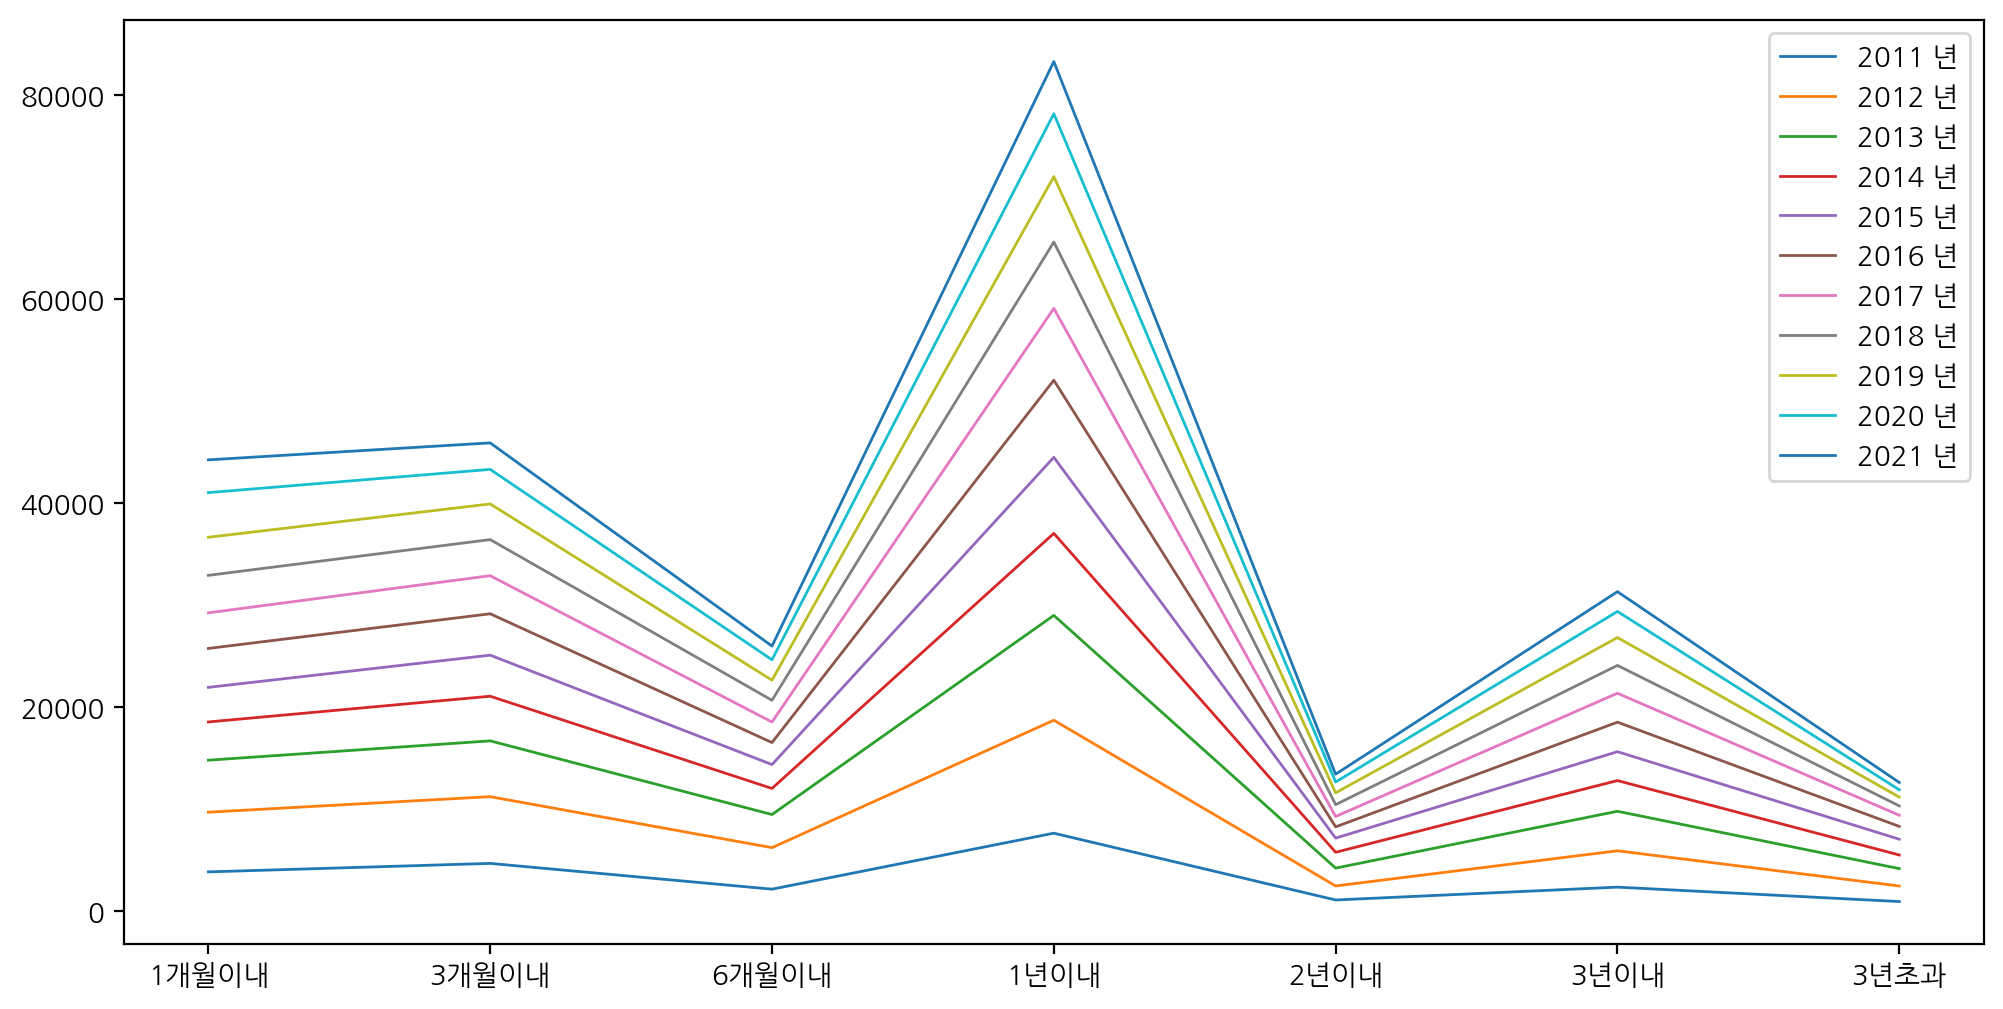

In [72]:
scon2.plot(figsize=(12,6), lw=1, stacked=True)